# Exercise 5

Implement Hermite interpolation using divided differences: find
  $p \in P^{2n+1}$ such that
  $$
  p(x_i) = f(x_i) \qquad \text{ and } \qquad p^\prime(x_i) =
  f^\prime(x_i)  \qquad \text{ for } i = 0 \ldots n
  $$

Test your implementation for $f(x) = \sin(x)$, and $x_0 = 0, x_1 =
\pi/2, x_2 = \pi$. 

You can start from the notebook *NewtonInterpolation.ipynb*
provided in the lecture.

In [1]:
from math import pi,sin,cos,factorial
import numpy as np
import matplotlib.pyplot as plt


def NewtonInterpol (pts, vals, fprime):
    """
    Calculate coefficients of Newton interpol by 
    divided differences.
    
    input: 
       pts ... list of points
       val ... list of values
       
    output: 
       divided differences
    """
    n = len(pts)-1
    dd = np.copy(np.asarray(vals))
    for i in range(n):
        for j in range(n, i, -1):
            if ((pts[j]-pts[j-i-1]) == 0):
                dd[j] = fprime(pts[j])
            else:
                dd[j] = (dd[j]-dd[j-1]) / (pts[j]-pts[j-i-1])
    return dd

def Horner (pts, dd, x):
    """
    Horner scheme for polynomial evaluation in Newton basis
    """
    n = len(pts)-1
    sum = dd[n]
    for i in range(n-1, -1, -1):
        sum = sum * (x-pts[i]) + dd[i]
    return sum
        
f = lambda x: sin(x)
fprime = lambda x: cos(x)
pts = [0, 0, pi/2, pi/2, pi, pi]
vals = [f(p) for p in pts]

dd = NewtonInterpol (pts, vals, fprime)
x = np.linspace(0,1)
y = [Horner(pts, dd, xi) for xi in x]
y2 = [sin(xi) for xi in x]
plt.plot(x,y)
plt.plot(x,y2)
plt.show()


# Exercise 6

Compare the interpolation errors (convergence plots) of polynomial interpolation and spline interplation with classical cubic splines for the functions

1) $f(x) = \sqrt{x}$ on  $[0,1]$

2) $f(x) = \arctan(10 x)$ on $[-1,1]$

You can start from the notebook *splines.ipynb* using the interpolate module from scipy. Try to find good knot distributions.

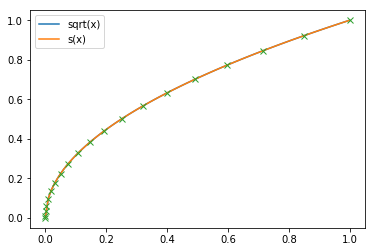

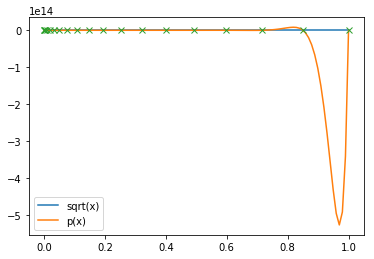

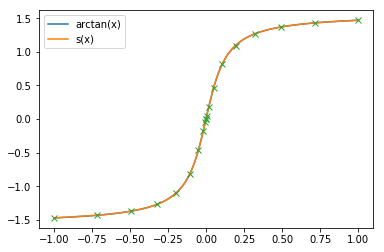

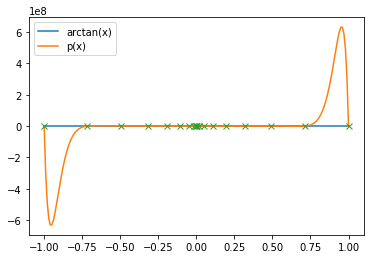

In [2]:
from scipy import interpolate

def ChebyshevPts(a,b,n):
    pts = [ cos( (2*j-1)*pi/(2*n) ) for j in range(n, 0, -1)]
    return np.array([(a + b + (b-a) * xi) / 2 for xi in pts ])

def f1(x): return np.sqrt(x)
def f2(x): return np.arctan(10*x)

#try out different amount of nodes
n = 20

#differnt point distribution
#equidistant distribution
#pts1 = np.linspace(0, 1, n)
#pts2 = np.linspace(-1, 1, n)

#Best distribution for interpolation
#pts1 = ChebyshevPts(0, 1, n)
#pts2 = ChebyshevPts(-1, 1, n)

#good distribution for spilnes
pts1 = np.linspace(0, 1, n)**3
pts2 = np.linspace(-1,1,n)**3

vals1 = f1(pts1)
vals2 = f2(pts2)

tck1 = interpolate.splrep(pts1, vals1)
tck2 = interpolate.splrep(pts2, vals2)

dd1 = NewtonInterpol (pts1, vals1, None)
dd2 = NewtonInterpol (pts2, vals2, None)

x1 = np.linspace(0,1,100)
x2 = np.linspace(-1,1,200)

plt.plot (x1, f1(x1), label = "sqrt(x)")
plt.plot(x1, interpolate.splev(x1, tck1), label = "s(x)")
plt.plot(pts1, vals1, "x")
plt.legend()
plt.show()

plt.plot (x1, f1(x1), label = 'sqrt(x)')
plt.plot(x1, [Horner(pts1, dd1, xi) for xi in x1], label = 'p(x)')
plt.plot(pts1, vals1, "x")
plt.legend()
plt.show()

plt.plot (x2, f2(x2), label = "arctan(x)")
plt.plot(x2, interpolate.splev(x2, tck2), label = "s(x)")
plt.plot(pts2, vals2, "x")
plt.legend()
plt.show()

plt.plot (x2, f2(x2),label = 'arctan(x)')
plt.plot(x2, [Horner(pts2, dd2, xi) for xi in x2], label = 'p(x)')
plt.plot(pts2, vals2, "x")
plt.legend()
plt.show()

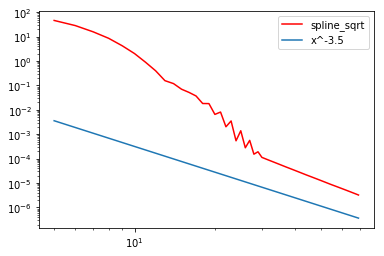

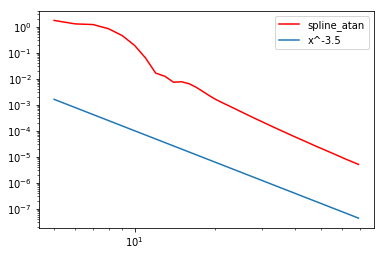

In [5]:
samples = []
err1 = []
err2 = []
err3 = []
err4 = []
yref = []
yref2 = []
#pnt_type = 'lin' 
pnt_type = 'nonlin'
#pnt_type = 'cheby'
for n in range(5,70):
    samples.append(n)
    if pnt_type == 'lin':
        pts1 = np.linspace(0, 1, n)
        pts2 = np.linspace(-1, 1, n)
    
    if pnt_type == 'nonlin':
        pts1 = np.power(np.linspace(0, 1, n), 7)
        pts2 = np.linspace(-1, 1, n)**3

    else:
        pts1 = ChebyshevPts(0, 1, n)
        pts2 = ChebyshevPts(-1, 1, n)
    
    vals1 = f1(pts1)
    vals2 = f2(pts2)
    
    tck1 = interpolate.splrep(pts1, vals1)
    tck2 = interpolate.splrep(pts2, vals2)
                            
    maxerr1 = max(abs(interpolate.splev(x1, tck1) - f1(x1))) 
    err1.append(maxerr1)
    maxerr2 = max(abs(interpolate.splev(x2, tck2) - f2(x2))) 
    err2.append(maxerr2)
      
    dd1 = NewtonInterpol (pts1, vals1, None)
    dd2 = NewtonInterpol (pts2, vals2, None)

    maxerr3 = max(abs([Horner(pts1, dd1, xi) for xi in x1] - f1(x1))) 
    err3.append(maxerr3)
    maxerr4 = max(abs([Horner(pts2, dd2, xi) for xi in x2] - f2(x2))) 
    err4.append(maxerr4)
    
    yref.append(1/np.power(n,3.5))
    yref2.append(1/np.power(n,4))
    
    
plt.loglog(samples, err1, 'r',label = 'spline_sqrt')
if pnt_type is not 'nonlin':
    plt.plot(samples, err3, 'b',label = 'poly_sqrt')
plt.plot(samples, yref, label = 'x^-3.5')
plt.legend()
plt.show()
plt.loglog(samples, err2, 'r',label = 'spline_atan')
plt.plot(samples, yref2, label = 'x^-3.5')
if pnt_type is not 'nonlin':
    plt.plot(samples, err4, 'b',label = 'poly_atan')
plt.legend()
plt.show()    

__Explanation:__ Consieder the family of nodes $(x_i)_{i=0}^N$ defined by $x_i := (ih)^k$, where $k\in\mathbb{R}^+$ and $h := \frac{1}{N}$. The interpolation local error for cubic splines is given by 
$$
    \|f-s\|_{\infty, [x_i, x_i+h]} \leq Ch^4\|f^{(4)}\|_{\infty, [x_i, x_i +h]}.
$$
The forth derivative of the square root function behaves like $x^{-7/2}$, thus
\begin{align}
    \|f-s\|_{\infty, [x_i, x_i+h]} &\leq C h^{4k}((i+1)^k - i^k)^4 (ih)^{-7k/2}\\
    &\approx h^{k/2}(i^{k-1})^4 i^{-7k/2} = h^{k/2}i^{k/2-3.5}
\end{align}
for all $i = 1,...,N$. If $k/2 = 3.5$, we obtain convergence of order $3.5$. However, choosing a larger $k$ does not improve the rate of convergence, as the maximal distance, which is given by $|x_N - x_{N-1}|$, becomes larger.

The case where $f(x) = \arctan(x)$ works analogously.

# Exercise 7

Find a good approximation to
  $$
  \sum_{j=1}^\infty \frac{6}{j^2} 
  $$
  by extrapolation. Hint: define the function
  $$
  f : \{ 1/n : n \in \mathbb{N} \} \rightarrow \mathbb{R} : x \mapsto \sum_{j=1}^{1/x} \frac{6}{j^2},
  $$
  apply polynomial interpolation with knots $x_i = 2^{-i}$, and
  evaluate the interpolation polynomial at $x = 0$.

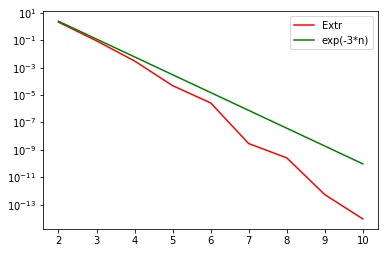

In [17]:
def Neville(x, f, xbar):
    y = np.copy(f)
    n = len(x)
    for m in range(1,n):
        for j in range(n-m):
            tmp = y[j]
            y[j] = ( (xbar-x[j]) * y[j+1] - (xbar-x[j+m])*tmp ) / (x[j+m] - x[j])
    return y[0]

def f(x):
    tmp = 0
    for j in range(1, int(1/x)):
        tmp += 1/j**2
    return 6*tmp


x = []
y = []
yref = []
for n in range(2, 11):
    x.append(n)
    pts = [np.power(0.5,i) for i in range(n)]
    vals = [f(p) for p in pts]
    y.append(abs(pi**2 - Neville(pts, vals, 0)))
    yref.append(1000*np.exp(-n*3))
    
plt.plot(x, y, 'r', label = "Extr")
plt.plot(x, yref, 'g', label = "exp(-3*n)")
plt.legend()
plt.yscale('log')
plt.show()

# Exercise 8

Let
\begin{eqnarray*}
  I_n : C([a,b]) & \rightarrow & C([a,b])  \\
  f & \mapsto & \sum_{i=0}^n f(x_i) l_i( \cdot )
\end{eqnarray*}
be the Lagrange interpolation operator. Prove that its operator norm
defined by
$$
\| I_n \|_\infty := \sup_{f \in C([a,b]), f \neq 0}  \frac{   \| I_n f
  \|_\infty} { \| f \|_\infty }
$$
evaluates to
$$
\| I_n \|_\infty = \sup_{x \in [a,b]}  \sum_{i=0}^n  | l_i(x) |.
$$
Hint: part of the work was already done in class

__Proof.__ In class it has been shown that
\begin{align}
    \| I_n f \|_{\infty} \leq \| f \|_\infty
 \sup_{x \in [a,b]}  \sum_{i=0}^n  | l_i(x) | 
\end{align}
and hence
$$
    \| I_n \|_{\infty} \leq \sup_{x \in [a,b]}  \sum_{i=0}^n  | l_i(x) |.
$$
Let now $\tilde{x}$ in $[a,b]$ arbitrary, then there holds for for the linear spline interpolant $f$ of the pairs $(x_i, \operatorname{sgn}(l_i(\tilde{x}))$ für $i = 0, ..., n$ that
$$
    \| I_n \|_{\infty} \geq \frac{   \| I_n f \|_\infty} { \| f \|_\infty } = \| I_n f \|_\infty = \max_{x \in [a,b]}|\sum_{i = 0}^n f(x_i)\cdot l_i(x)| \geq |\sum_{i = 0}^n f(x_i)\cdot l_i(\tilde{x})| = \sum_{i = 0}^n |l_i(\tilde{x})| = \sum_{i = 0}^n |l_i(\tilde{x})|.
$$
Since $\tilde{x}$ was chosen arbitrary, this proves the claim.